# GAN Project
## Liz Parker, Colin Craighead, and Aren Dalloul

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras import layers
from keras import models
from keras import utils
import tensorflow.keras.preprocessing.image as img
import scipy.io
from PIL import Image

Using TensorFlow backend.


## Preparing the Dataset

In [2]:
test_mat = scipy.io.loadmat("data/test_data.mat")
train_mat = scipy.io.loadmat("data/train_data.mat")

In [3]:
def unpack_mat(mat, train_or_test):
    df = pd.DataFrame()
    paths = []
    breeds = []
    breed_ids = []
    num_datapoints = len(mat[train_or_test][0][0][0])
    for i in range(num_datapoints):
        path = "data/images/" + mat[train_or_test][0][0][0][i][0][0]
        paths.append(path)
        temp_arr = mat[train_or_test][0][0][1][i][0][0].strip().split('-')
        breed_str = "-".join(temp_arr[1:]).split('/')[0]
        breeds.append(breed_str)
        breed_ids.append(mat[train_or_test][0][0][2][i][0])
    df['breed'] = breeds
    df['breed_id'] = breed_ids
    df['path'] = paths
    return df

In [11]:
train_df = unpack_mat(train_mat, 'train_info')
test_df = unpack_mat(test_mat, 'test_info')
train_df.head()

#TO REMOVE !!!!!!!!!!!!!
train_df = train_df.truncate(after = 1000)

In [53]:
X_train = np.array([img.img_to_array(img.load_img(path)) for path in train_df['path']])

In [28]:
heights = [x.shape[0] for x in X_train]
widths = [x.shape[1] for x in X_train]
avgHeight = np.mean(train_df['height'])
avgWidth = np.mean(train_df['width'])

Average image height is: 389.0


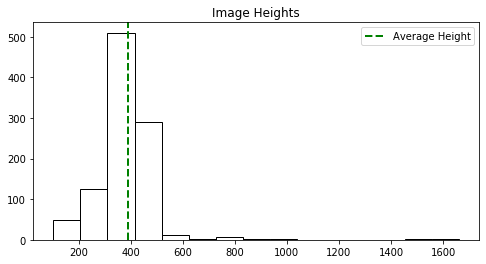

In [43]:
# Plot Histogram of image heights
print("Average image height is:", round(avgHeight))
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()
ax.hist(heights, bins=15, range=(np.min(heights), np.max(heights)), color='white',  edgecolor='black')
ax.set_title("Image Heights")
ax.axvline(x = avgHeight, linewidth=2, color='g', ls = "--", label = "Average Height")
ax.legend()

Average image width is: 433.0


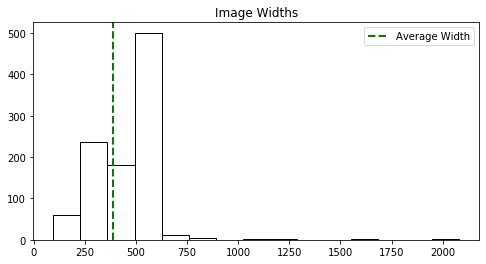

In [42]:
# Plot Histogram of image widths
print("Average image width is:", round(avgWidth))
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()
ax.hist(widths, bins=15, range=(np.min(widths), np.max(widths)), color='white',  edgecolor='black')
ax.set_title("Image Widths")
ax.axvline(x = avgHeight, linewidth=2, color='g', ls = "--", label = "Average Width")
ax.legend()

In [56]:
X_train = np.array([img.img_to_array(img.load_img(path, target_size = (244,244))) for path in train_df['path']])

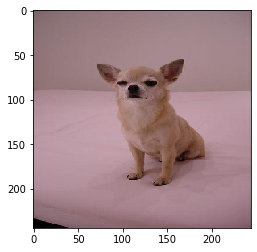

In [57]:
plt.imshow(X_train[1].astype('uint8'))